In [1]:
pip install tensorflow matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


C:\Users\sguha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.3565 - loss: 1.7508 - val_accuracy: 0.5218 - val_loss: 1.3560
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.5703 - loss: 1.2156 - val_accuracy: 0.5993 - val_loss: 1.1441
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.6299 - loss: 1.0579 - val_accuracy: 0.6339 - val_loss: 1.0583
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6651 - loss: 0.9603 - val_accuracy: 0.6367 - val_loss: 1.0498
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.6943 - loss: 0.8806 - val_accuracy: 0.6560 - val_loss: 0.9825
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 18ms/step - accuracy: 0.7108 - loss: 0.8360 - val_accuracy: 0.6727 - val_loss: 0.9584
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - accuracy: 0.7339 - loss: 0.7727 - val_accuracy: 0.6817 - val_loss: 0.9344
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 22ms/step - accuracy: 0.7486 -

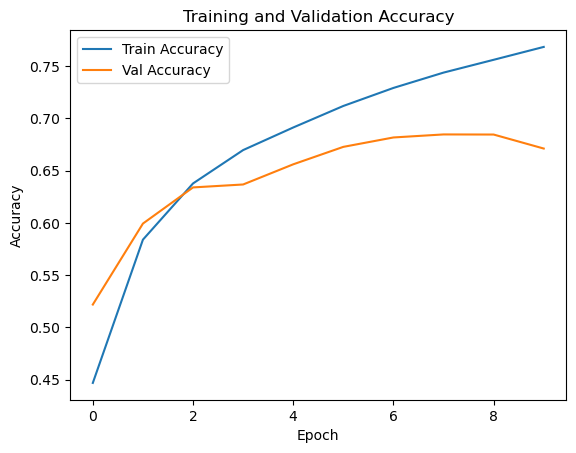

313/313 - 2s - 7ms/step - accuracy: 0.6695 - loss: 1.0063

Test accuracy: 0.6694999933242798
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


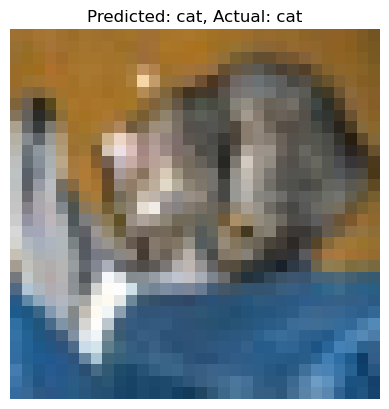

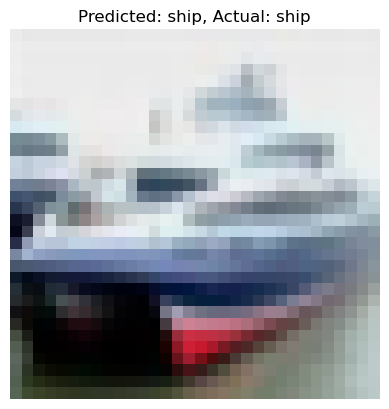

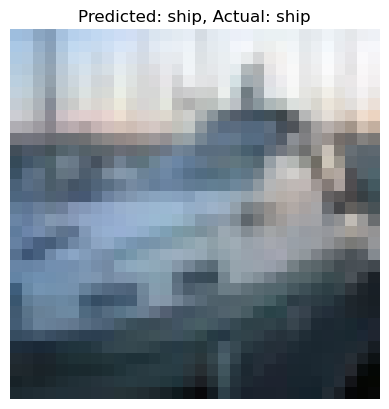

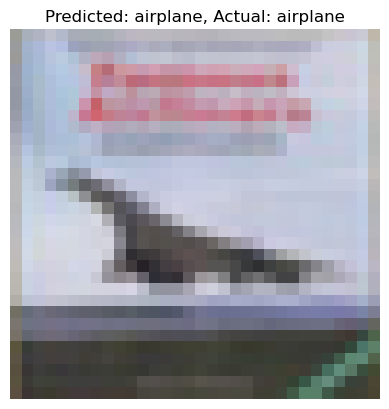

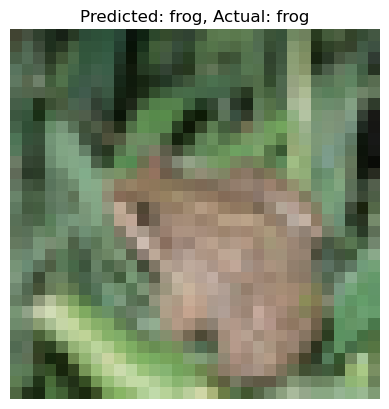

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# --------------------------
# Step 1: Load and Preprocess Data
# --------------------------
def load_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    return (x_train, y_train), (x_test, y_test), class_names

# --------------------------
# Step 2: Build Model
# --------------------------
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# --------------------------
# Step 3: Train Model
# --------------------------
def train_model(model, x_train, y_train):
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)
    return history

# --------------------------
# Step 4: Evaluate and Visualize
# --------------------------
def evaluate_and_plot(model, history, x_test, y_test, class_names):
    # Accuracy/loss curves
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Evaluate on test data
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # Predict and show images
    predictions = model.predict(x_test[:5])
    for i in range(5):
        plt.imshow(x_test[i])
        plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[y_test[i][0]]}")
        plt.axis('off')
        plt.show()

# --------------------------
# Main Function
# --------------------------
def main():
    (x_train, y_train), (x_test, y_test), class_names = load_data()
    model = build_model()
    history = train_model(model, x_train, y_train)
    evaluate_and_plot(model, history, x_test, y_test, class_names)

if __name__ == '__main__':
    main()
